In [589]:
import pandas as pd
from keras.models import Sequential, load_model, Model
from keras.layers import LSTM, Dropout, TimeDistributed, Dense, Activation, Embedding
import numpy as np
import string
from matplotlib import pyplot as plt

## Dataset

In this experiment we use data from online shop. We are going insert an artificial pattern inside of it and try to find this pattern via LSTM metwork activations.

In [736]:
df = pd.read_csv('data_etsy.csv')
w = df['description'].values
w = ''.join(w)

vocab = list(string.ascii_lowercase + string.digits + ' ')
vocab_size = len(vocab)

data_long_string = w.lower()
for char in list(set(data_long_string)):
    if char not in vocab:
        data_long_string = data_long_string.replace(char, '')
data_list_of_chars = np.array(list(data_long_string))

map_char_to_float = {char:i for i, char in enumerate(vocab)}
def encode_string(string):
    return np.array([map_char_to_float[char] for char in string])

data_list_of_ints = encode_string(data_list_of_chars)

#data_list_of_ints = np.random.randint(0, 15, size=int(1e5))
random_indices = np.random.randint(0, len(data_list_of_ints), len(data_list_of_ints) // 1000)
data_list_of_ints[random_indices] = 10
data_list_of_ints[random_indices + 1] = 11
data_list_of_ints[random_indices + 2] = 12

<br>

## Neural Network Fitting

In [737]:
BATCH_SIZE = 16
SEQ_LENGTH = 37

In [738]:
model = Sequential()
model.add(Embedding(vocab_size, 512, batch_input_shape=(BATCH_SIZE, SEQ_LENGTH)))
for i in range(3):
    model.add(LSTM(256, return_sequences=True, stateful=True))
model.add(TimeDistributed(Dense(vocab_size)))
model.add(Activation('softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',
                optimizer='adam', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (16, 37, 512)             18944     
_________________________________________________________________
lstm_31 (LSTM)               (16, 37, 256)             787456    
_________________________________________________________________
lstm_32 (LSTM)               (16, 37, 256)             525312    
_________________________________________________________________
lstm_33 (LSTM)               (16, 37, 256)             525312    
_________________________________________________________________
time_distributed_11 (TimeDis (16, 37, 37)              9509      
_________________________________________________________________
activation_11 (Activation)   (16, 37, 37)              0         
Total params: 1,866,533
Trainable params: 1,866,533
Non-trainable params: 0
_________________________________________________________________


In [739]:
def read_batches(T, vocab_size):
    length = T.shape[0]
    batch_chars = length // BATCH_SIZE

    for start in range(0, batch_chars - SEQ_LENGTH, SEQ_LENGTH):
        X = np.zeros((BATCH_SIZE, SEQ_LENGTH))
        Y = np.zeros((BATCH_SIZE, SEQ_LENGTH, vocab_size))
        for batch_idx in range(0, BATCH_SIZE):
            for i in range(0, SEQ_LENGTH):
                X[batch_idx, i] = T[batch_chars * batch_idx + start + i]
                Y[batch_idx, i, T[batch_chars * batch_idx + start + i + 1]] = 1
        yield X, Y

In [740]:
for i, (X, Y) in enumerate(read_batches(data_list_of_ints, vocab_size)):
    loss, acc = model.train_on_batch(X, Y)
    print('Batch {}: loss = {:.4f}, acc = {:.5f}'.format(i + 1, loss, acc))
    
    if i == 2000: break

Batch 1: loss = 3.6103, acc = 0.03041
Batch 2: loss = 3.5979, acc = 0.15541
Batch 3: loss = 3.5696, acc = 0.15541
Batch 4: loss = 3.4941, acc = 0.17061
Batch 5: loss = 3.2848, acc = 0.16723
Batch 6: loss = 3.4763, acc = 0.16216
Batch 7: loss = 3.2593, acc = 0.15034
Batch 8: loss = 3.0407, acc = 0.17568
Batch 9: loss = 3.1187, acc = 0.07770
Batch 10: loss = 3.1599, acc = 0.07939
Batch 11: loss = 3.1178, acc = 0.09122
Batch 12: loss = 3.0996, acc = 0.09122
Batch 13: loss = 3.0629, acc = 0.08615
Batch 14: loss = 3.0405, acc = 0.09966
Batch 15: loss = 3.0619, acc = 0.16047
Batch 16: loss = 2.9962, acc = 0.16554
Batch 17: loss = 2.9899, acc = 0.16047
Batch 18: loss = 2.9656, acc = 0.15203
Batch 19: loss = 2.9396, acc = 0.17568
Batch 20: loss = 2.9966, acc = 0.14865
Batch 21: loss = 3.0517, acc = 0.16554
Batch 22: loss = 3.0025, acc = 0.14865
Batch 23: loss = 3.0055, acc = 0.17230
Batch 24: loss = 3.0258, acc = 0.15541
Batch 25: loss = 3.0350, acc = 0.15203
Batch 26: loss = 3.0706, acc = 0.1

Batch 209: loss = 2.7106, acc = 0.22804
Batch 210: loss = 2.7375, acc = 0.22466
Batch 211: loss = 2.7692, acc = 0.19764
Batch 212: loss = 2.7751, acc = 0.18412
Batch 213: loss = 2.7186, acc = 0.20270
Batch 214: loss = 2.7605, acc = 0.21453
Batch 215: loss = 2.6739, acc = 0.22128
Batch 216: loss = 2.7390, acc = 0.23311
Batch 217: loss = 2.6796, acc = 0.22973
Batch 218: loss = 2.7392, acc = 0.22804
Batch 219: loss = 2.6976, acc = 0.23480
Batch 220: loss = 2.7010, acc = 0.20439
Batch 221: loss = 2.6216, acc = 0.22297
Batch 222: loss = 2.6074, acc = 0.24324
Batch 223: loss = 2.6290, acc = 0.26689
Batch 224: loss = 2.6468, acc = 0.23818
Batch 225: loss = 2.6885, acc = 0.23480
Batch 226: loss = 2.5341, acc = 0.25169
Batch 227: loss = 2.6314, acc = 0.26182
Batch 228: loss = 2.5536, acc = 0.23986
Batch 229: loss = 2.5573, acc = 0.25000
Batch 230: loss = 2.4914, acc = 0.25338
Batch 231: loss = 2.5480, acc = 0.26689
Batch 232: loss = 2.4949, acc = 0.25676
Batch 233: loss = 2.4858, acc = 0.25169


Batch 415: loss = 2.1321, acc = 0.35980
Batch 416: loss = 2.0904, acc = 0.38682
Batch 417: loss = 2.1474, acc = 0.38682
Batch 418: loss = 2.0088, acc = 0.40541
Batch 419: loss = 2.0666, acc = 0.40372
Batch 420: loss = 2.1473, acc = 0.34966
Batch 421: loss = 2.1861, acc = 0.34291
Batch 422: loss = 2.1791, acc = 0.36318
Batch 423: loss = 2.2686, acc = 0.34628
Batch 424: loss = 2.1228, acc = 0.38851
Batch 425: loss = 2.1298, acc = 0.38345
Batch 426: loss = 2.1593, acc = 0.36655
Batch 427: loss = 2.1456, acc = 0.35980
Batch 428: loss = 2.0812, acc = 0.37500
Batch 429: loss = 2.0644, acc = 0.39020
Batch 430: loss = 2.0438, acc = 0.40203
Batch 431: loss = 2.1158, acc = 0.39696
Batch 432: loss = 2.0160, acc = 0.39527
Batch 433: loss = 2.1141, acc = 0.35304
Batch 434: loss = 2.1902, acc = 0.37162
Batch 435: loss = 2.0851, acc = 0.38851
Batch 436: loss = 2.1471, acc = 0.39696
Batch 437: loss = 2.0329, acc = 0.38682
Batch 438: loss = 2.0770, acc = 0.39189
Batch 439: loss = 2.0985, acc = 0.39020


Batch 621: loss = 1.8117, acc = 0.47466
Batch 622: loss = 1.8871, acc = 0.44426
Batch 623: loss = 1.8366, acc = 0.48480
Batch 624: loss = 1.9656, acc = 0.42061
Batch 625: loss = 1.8750, acc = 0.46959
Batch 626: loss = 1.7650, acc = 0.49662
Batch 627: loss = 1.9176, acc = 0.44088
Batch 628: loss = 1.7973, acc = 0.48480
Batch 629: loss = 1.8961, acc = 0.43750
Batch 630: loss = 1.9218, acc = 0.43074
Batch 631: loss = 1.8827, acc = 0.43581
Batch 632: loss = 1.7948, acc = 0.47297
Batch 633: loss = 1.8416, acc = 0.47804
Batch 634: loss = 1.9611, acc = 0.44257
Batch 635: loss = 1.8532, acc = 0.45946
Batch 636: loss = 2.0367, acc = 0.42399
Batch 637: loss = 1.8061, acc = 0.47128
Batch 638: loss = 1.7184, acc = 0.51351
Batch 639: loss = 1.7812, acc = 0.47297
Batch 640: loss = 1.7734, acc = 0.47128
Batch 641: loss = 1.7800, acc = 0.49831
Batch 642: loss = 1.8317, acc = 0.46284
Batch 643: loss = 1.8221, acc = 0.45608
Batch 644: loss = 1.8343, acc = 0.48649
Batch 645: loss = 1.6671, acc = 0.49155


Batch 827: loss = 1.8295, acc = 0.47297
Batch 828: loss = 1.7325, acc = 0.49662
Batch 829: loss = 1.7275, acc = 0.51520
Batch 830: loss = 1.6445, acc = 0.50507
Batch 831: loss = 1.7777, acc = 0.51858
Batch 832: loss = 1.6865, acc = 0.48818
Batch 833: loss = 1.6881, acc = 0.49493
Batch 834: loss = 1.8186, acc = 0.49155
Batch 835: loss = 1.6775, acc = 0.48818
Batch 836: loss = 1.7082, acc = 0.51182
Batch 837: loss = 1.6470, acc = 0.50338
Batch 838: loss = 1.5715, acc = 0.53209
Batch 839: loss = 1.7522, acc = 0.47973
Batch 840: loss = 1.7566, acc = 0.47973
Batch 841: loss = 1.6711, acc = 0.52365
Batch 842: loss = 1.6187, acc = 0.52534
Batch 843: loss = 1.4287, acc = 0.60642
Batch 844: loss = 1.5577, acc = 0.54223
Batch 845: loss = 1.5590, acc = 0.54223
Batch 846: loss = 1.5896, acc = 0.55068
Batch 847: loss = 1.5932, acc = 0.52703
Batch 848: loss = 1.6815, acc = 0.51689
Batch 849: loss = 1.9222, acc = 0.43750
Batch 850: loss = 1.7502, acc = 0.47297
Batch 851: loss = 1.6983, acc = 0.49324


Batch 1033: loss = 1.7931, acc = 0.49155
Batch 1034: loss = 1.7456, acc = 0.51520
Batch 1035: loss = 1.6845, acc = 0.55236
Batch 1036: loss = 1.4807, acc = 0.55236
Batch 1037: loss = 1.6399, acc = 0.53885
Batch 1038: loss = 1.6866, acc = 0.51014
Batch 1039: loss = 1.6955, acc = 0.51351
Batch 1040: loss = 1.6803, acc = 0.53547
Batch 1041: loss = 1.5971, acc = 0.55574
Batch 1042: loss = 1.6010, acc = 0.52872
Batch 1043: loss = 1.6741, acc = 0.50338
Batch 1044: loss = 1.7500, acc = 0.49155
Batch 1045: loss = 1.7671, acc = 0.48311
Batch 1046: loss = 1.6267, acc = 0.54561
Batch 1047: loss = 1.5230, acc = 0.54223
Batch 1048: loss = 1.7620, acc = 0.48818
Batch 1049: loss = 1.6884, acc = 0.50169
Batch 1050: loss = 1.8661, acc = 0.47297
Batch 1051: loss = 1.8271, acc = 0.46453
Batch 1052: loss = 1.5780, acc = 0.53378
Batch 1053: loss = 1.7626, acc = 0.48649
Batch 1054: loss = 1.6500, acc = 0.53716
Batch 1055: loss = 1.7335, acc = 0.50507
Batch 1056: loss = 1.6165, acc = 0.55068
Batch 1057: loss

Batch 1233: loss = 1.4338, acc = 0.56419
Batch 1234: loss = 1.5660, acc = 0.52196
Batch 1235: loss = 1.4095, acc = 0.58446
Batch 1236: loss = 1.4956, acc = 0.55068
Batch 1237: loss = 1.5301, acc = 0.55405
Batch 1238: loss = 1.4806, acc = 0.56250
Batch 1239: loss = 1.4886, acc = 0.55743
Batch 1240: loss = 1.5549, acc = 0.55743
Batch 1241: loss = 1.5163, acc = 0.55574
Batch 1242: loss = 1.3851, acc = 0.58953
Batch 1243: loss = 1.5641, acc = 0.54054
Batch 1244: loss = 1.5463, acc = 0.55068
Batch 1245: loss = 1.4426, acc = 0.55912
Batch 1246: loss = 1.4596, acc = 0.56081
Batch 1247: loss = 1.5524, acc = 0.53041
Batch 1248: loss = 1.4252, acc = 0.60135
Batch 1249: loss = 1.5419, acc = 0.50507
Batch 1250: loss = 1.5548, acc = 0.53209
Batch 1251: loss = 1.5349, acc = 0.54223
Batch 1252: loss = 1.4816, acc = 0.57264
Batch 1253: loss = 1.3918, acc = 0.54899
Batch 1254: loss = 1.4940, acc = 0.55574
Batch 1255: loss = 1.4724, acc = 0.55236
Batch 1256: loss = 1.5044, acc = 0.54899
Batch 1257: loss

Batch 1433: loss = 1.5084, acc = 0.54561
Batch 1434: loss = 1.5442, acc = 0.52196
Batch 1435: loss = 1.4930, acc = 0.55574
Batch 1436: loss = 1.4819, acc = 0.56926
Batch 1437: loss = 1.4710, acc = 0.55574
Batch 1438: loss = 1.4201, acc = 0.58446
Batch 1439: loss = 1.5589, acc = 0.51014
Batch 1440: loss = 1.5744, acc = 0.55236
Batch 1441: loss = 1.4838, acc = 0.55743
Batch 1442: loss = 1.5685, acc = 0.54223
Batch 1443: loss = 1.5954, acc = 0.53041
Batch 1444: loss = 1.6104, acc = 0.51689
Batch 1445: loss = 1.6613, acc = 0.48986
Batch 1446: loss = 1.5789, acc = 0.54054
Batch 1447: loss = 1.5209, acc = 0.53885
Batch 1448: loss = 1.6441, acc = 0.51014
Batch 1449: loss = 1.5902, acc = 0.51858
Batch 1450: loss = 1.5785, acc = 0.54730
Batch 1451: loss = 1.7091, acc = 0.48818
Batch 1452: loss = 1.6216, acc = 0.52027
Batch 1453: loss = 1.4901, acc = 0.56926
Batch 1454: loss = 1.5150, acc = 0.55236
Batch 1455: loss = 1.5279, acc = 0.56250
Batch 1456: loss = 1.6657, acc = 0.51689
Batch 1457: loss

Batch 1633: loss = 1.3143, acc = 0.60135
Batch 1634: loss = 1.4664, acc = 0.56926
Batch 1635: loss = 1.3063, acc = 0.61149
Batch 1636: loss = 1.2670, acc = 0.60304
Batch 1637: loss = 1.4719, acc = 0.55574
Batch 1638: loss = 1.3343, acc = 0.58784
Batch 1639: loss = 1.4399, acc = 0.56250
Batch 1640: loss = 1.3543, acc = 0.57432
Batch 1641: loss = 1.4073, acc = 0.58108
Batch 1642: loss = 1.5062, acc = 0.55068
Batch 1643: loss = 1.3728, acc = 0.59459
Batch 1644: loss = 1.4011, acc = 0.59628
Batch 1645: loss = 1.2941, acc = 0.62331
Batch 1646: loss = 1.5278, acc = 0.57770
Batch 1647: loss = 1.3050, acc = 0.60980
Batch 1648: loss = 1.4656, acc = 0.59797
Batch 1649: loss = 1.4533, acc = 0.56419
Batch 1650: loss = 1.5181, acc = 0.55068
Batch 1651: loss = 1.4799, acc = 0.56588
Batch 1652: loss = 1.6172, acc = 0.51689
Batch 1653: loss = 1.5236, acc = 0.55405
Batch 1654: loss = 1.3889, acc = 0.58784
Batch 1655: loss = 1.4355, acc = 0.58953
Batch 1656: loss = 1.6392, acc = 0.52703
Batch 1657: loss

Batch 1833: loss = 1.5411, acc = 0.55236
Batch 1834: loss = 1.5291, acc = 0.54561
Batch 1835: loss = 1.3488, acc = 0.59291
Batch 1836: loss = 1.3341, acc = 0.59122
Batch 1837: loss = 1.5471, acc = 0.55743
Batch 1838: loss = 1.3598, acc = 0.60811
Batch 1839: loss = 1.4379, acc = 0.57095
Batch 1840: loss = 1.3973, acc = 0.58108
Batch 1841: loss = 1.4697, acc = 0.56588
Batch 1842: loss = 1.4586, acc = 0.58615
Batch 1843: loss = 1.5747, acc = 0.52872
Batch 1844: loss = 1.4294, acc = 0.57432
Batch 1845: loss = 1.4889, acc = 0.55405
Batch 1846: loss = 1.4955, acc = 0.55236
Batch 1847: loss = 1.4379, acc = 0.56926
Batch 1848: loss = 1.4755, acc = 0.57601
Batch 1849: loss = 1.5196, acc = 0.55912
Batch 1850: loss = 1.3340, acc = 0.60473
Batch 1851: loss = 1.4236, acc = 0.57095
Batch 1852: loss = 1.3461, acc = 0.60980
Batch 1853: loss = 1.3147, acc = 0.61824
Batch 1854: loss = 1.5000, acc = 0.54392
Batch 1855: loss = 1.4873, acc = 0.56250
Batch 1856: loss = 1.5849, acc = 0.53547
Batch 1857: loss

<br>

## Several Functions For Activations Computing

In [448]:
from keras import backend as K

# X,Y = next(read_batches(data_list_of_ints, vocab_size))

def get_layer_i_output_on_X(i, X):
    
    X = X.reshape(-1, SEQ_LENGTH)
    get_i_layer_output = K.function([model.layers[0].input],
                                    [model.layers[i].output])
    layer_output = get_i_layer_output([X])[0]
    
    return layer_output

def get_layer_j_parameters(j):
    layer = model.layers[j]
    n_units = layer.units
    
    kernel_i = layer.get_weights()[0][:,:n_units]
    kernel_f = layer.get_weights()[0][:,n_units:2*n_units]
    kernel_c = layer.get_weights()[0][:,2*n_units:3*n_units]
    kernel_o = layer.get_weights()[0][:,3*n_units:]
    
    recur_i = layer.get_weights()[1][:,:n_units]
    recur_f = layer.get_weights()[1][:,n_units:2*n_units]
    recur_c = layer.get_weights()[1][:,2*n_units:3*n_units]
    recur_o = layer.get_weights()[1][:,3*n_units:]
    
    bias_i = layer.get_weights()[2][:n_units]
    bias_f = layer.get_weights()[2][n_units:2*n_units]
    bias_c = layer.get_weights()[2][2*n_units:3*n_units]
    bias_o = layer.get_weights()[2][3*n_units:]
    
    dict_with_params = {'kernel_i':kernel_i,
                        'kernel_f':kernel_f,
                        'kernel_c':kernel_c,
                        'kernel_o':kernel_o,
                        'recur_i':recur_i,
                        'recur_f':recur_f,
                        'recur_c':recur_c,
                        'recur_o':recur_o,
                        'bias_i':bias_i,
                        'bias_f':bias_f,
                        'bias_c':bias_c,
                        'bias_o':bias_o,}
    
    return dict_with_params

def hard_sigmoid(x):
    return (x < -2.5).astype(int) * 0 + (x > 2.5).astype(int) * 1 + ((-2.5<=x) & (x<=2.5)).astype(int) * (0.2 * x + 0.5)

def evaluate_layer_j_on_input(j, x, h, c):
    d = get_layer_j_parameters(j)
    
    x = x.reshape(1,-1); h = h.reshape(1,-1); c = c.reshape(1,-1) 
    
    i = hard_sigmoid(x @ d['kernel_i'] + h @ d['recur_i'] + d['bias_i'])
    f = hard_sigmoid(x @ d['kernel_f'] + h @ d['recur_f'] + d['bias_f'])
    c = f * c + i * np.tanh(x @ d['kernel_c'] + h @ d['recur_c'] + d['bias_c'])
    o = hard_sigmoid(x @ d['kernel_o'] + h @ d['recur_o'] + d['bias_o'])
    
    h = o * np.tanh(c)
    return h, c 

def evaluate_layer_j_on_input_and_get_activations(j, x, h, c):
    d = get_layer_j_parameters(j)
    
    x = x.reshape(1,-1); h = h.reshape(1,-1); c = c.reshape(1,-1) 
    
    i = hard_sigmoid(x @ d['kernel_i'] + h @ d['recur_i'] + d['bias_i'])
    f = hard_sigmoid(x @ d['kernel_f'] + h @ d['recur_f'] + d['bias_f'])
    c = f * c + i * np.tanh(x @ d['kernel_c'] + h @ d['recur_c'] + d['bias_c'])
    o = hard_sigmoid(x @ d['kernel_o'] + h @ d['recur_o'] + d['bias_o'])
    
    h = o * np.tanh(c)
    return h, c, i, f, o

In [572]:
def get_activations(I, x, K):
    #x = encode_string(x)
    X = x.reshape(1, -1)
    X = np.concatenate([X]*BATCH_SIZE, axis=0)
    inp = get_layer_i_output_on_X(I-1, X)
    inp = inp[0]
    
    h, c = np.zeros(256), np.zeros(256)
    for j in range(K):
        h, c, i, f, o = evaluate_layer_j_on_input_and_get_activations(I, inp[j], h, c)
    return i.flatten(), f.flatten(), o.flatten()

In [758]:
#X = np.random.randint(0, len(vocab), size=[BATCH_SIZE, SEQ_LENGTH])
X = np.array([data_list_of_ints[i : i+SEQ_LENGTH] for i in np.random.randint(0, len(data_list_of_ints), size=BATCH_SIZE)])
random_indices = np.random.randint(15, SEQ_LENGTH-3, BATCH_SIZE)
for i, j in enumerate(random_indices):
    X[i,j] = 10; X[i,j+1] = 11; X[i,j+2] = 12

In [759]:
random_indices

array([30, 32, 23, 23, 24, 33, 29, 30, 17, 21, 27, 27, 27, 18, 15, 33])

In [760]:
q = [get_activations(2,X[i],random_indices[i]+1)[0] for i in range(BATCH_SIZE)]
q = np.array(q)
w = [get_activations(2,X[i],(random_indices[i] + 15) % 37)[0] for i in range(BATCH_SIZE)]
w = np.array(w)

/opt/conda/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


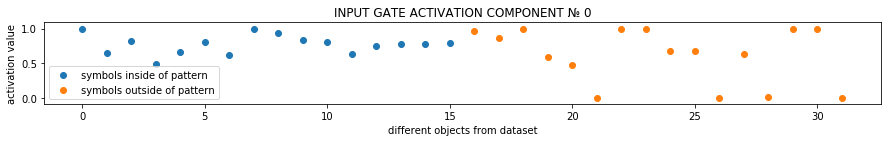

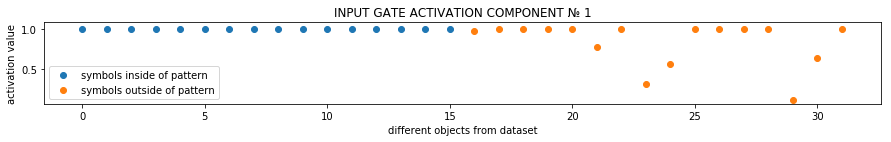

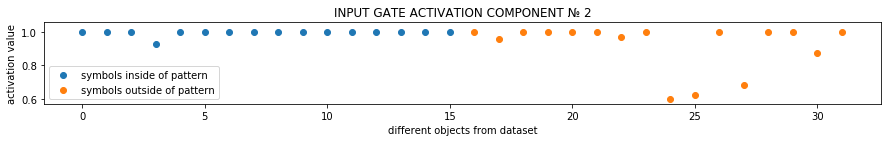

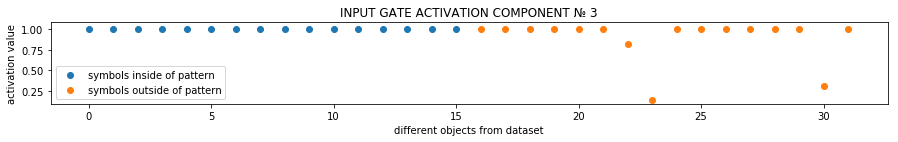

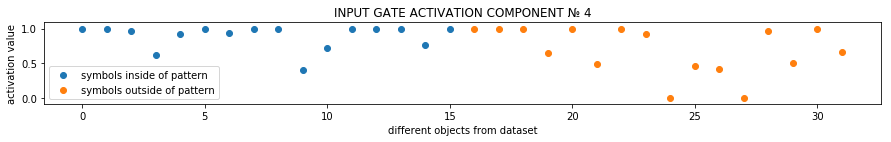

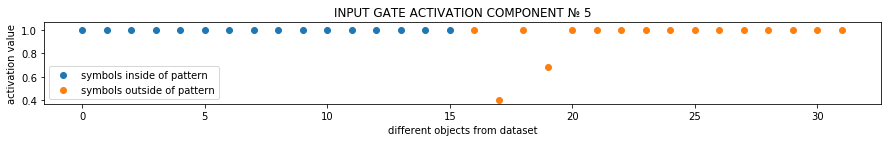

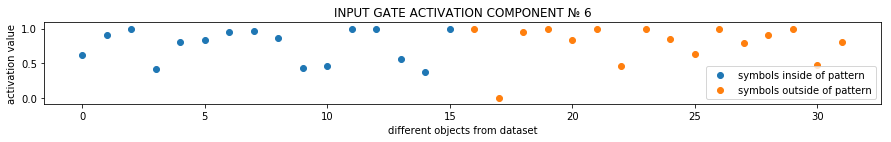

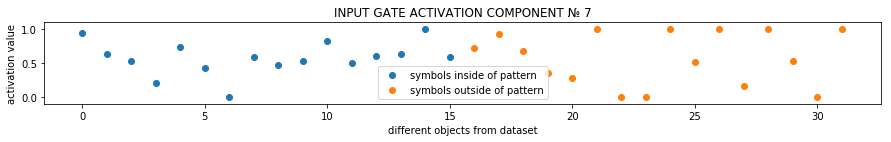

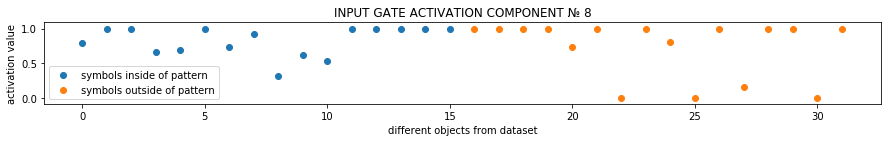

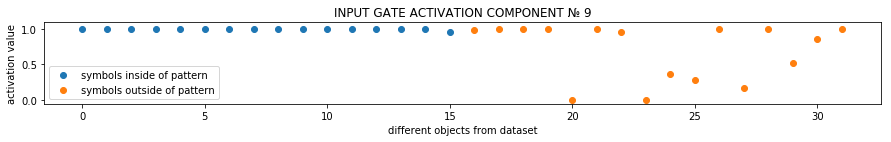

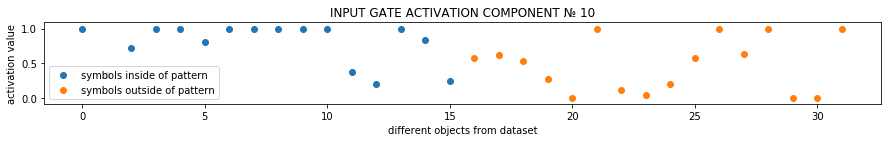

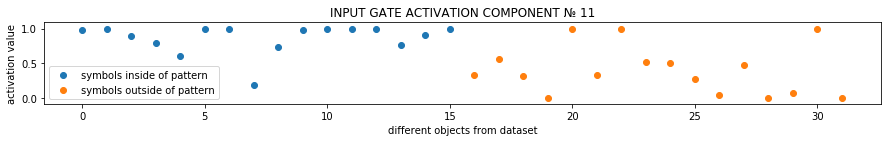

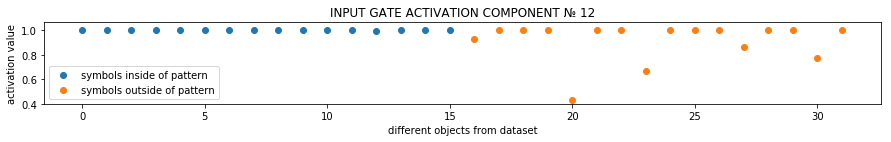

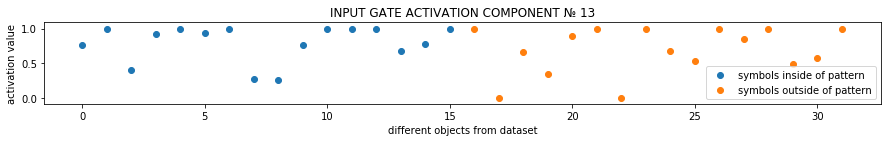

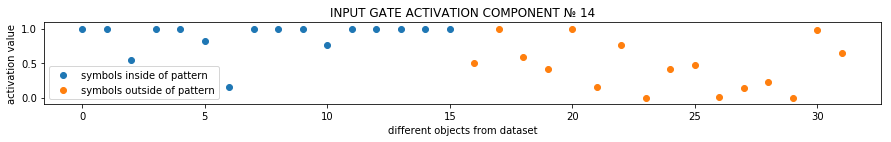

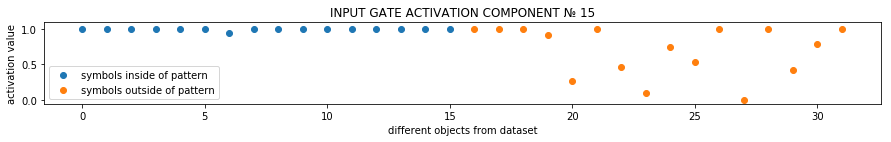

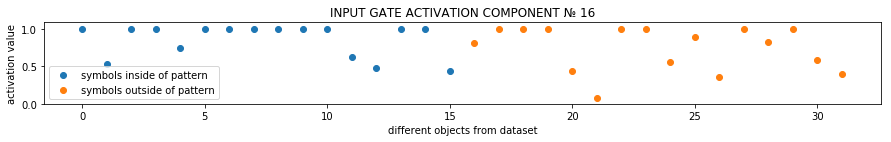

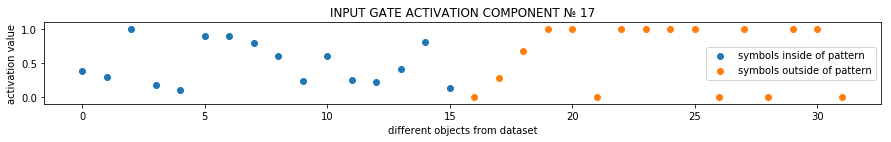

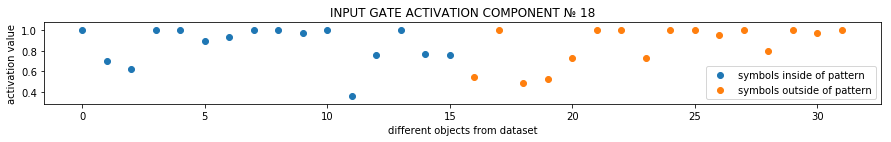

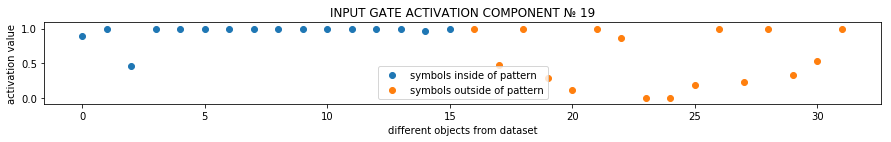

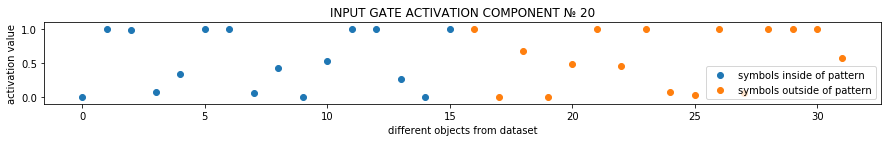

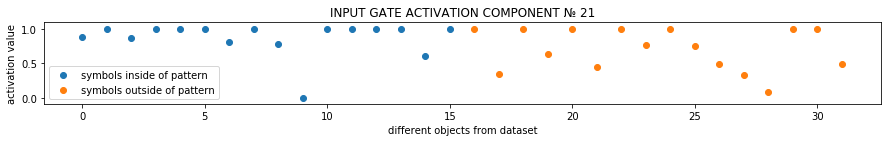

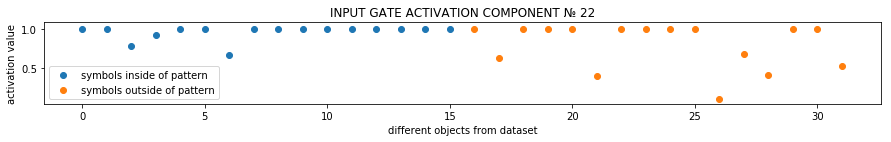

In [776]:
for i in range(0, 23):
    plt.figure(figsize=[15,1.5])
    plt.scatter(np.arange(len(q)), q[:,i], color='C0', label='symbols inside of pattern')
    plt.scatter(len(q)+np.arange(len(q)), w[:,i], color='C1', label='symbols outside of pattern')
    plt.ylabel('activation value')
    plt.xlabel('different objects from dataset')
    plt.title('INPUT GATE ACTIVATION COMPONENT № {}'.format(i))
    plt.legend()
plt.show()

**We can see that it is possible to catch an information about our pattern from such activations (for example, it is obvios that input gate №19 carry such information)**

<br>

## Binary Classifier Training

We are going to train a Support Vector Classifier on the input gate activation values.

In [771]:
X, y = [], []
for i in tqdm_notebook(range(200)):
    j = np.random.randint(0, len(data_list_of_ints))
    x = data_list_of_ints[j : j+SEQ_LENGTH]
    X.append(get_activations(2, x, np.random.randint(10,18)))
    y.append(0)
    
    ind = np.random.randint(10, 18)
    x[ind] = 10; x[ind+1] = 11; x[ind+2] = 12
    X.append(get_activations(2, x, ind+1))
    y.append(1)

In [772]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(np.array(X)[:,0,:30], y, test_size=0.2)

In [773]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [774]:
svc.score(X_test, y_test)

0.925

We got a 0.925 accuracy on test via our approach